In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.1.0'

In [2]:
keras.__version__

'2.2.4-tf'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000]/ 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Conv2D(300, 5, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 23s 426us/sample - loss: 0.7112 - accuracy: 0.7664 - val_loss: 0.5177 - val_accuracy: 0.8224
Epoch 2/30
51680/55000 [===========================>..] - ETA: 1s - loss: 0.4891 - accuracy: 0.8304

KeyboardInterrupt: 

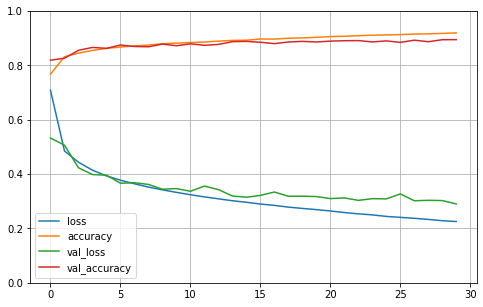

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 76us/sample - loss: 59.0910 - accuracy: 0.8547


[59.09096584849208, 0.8547]

In [48]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [49]:
y_train, y_test = keras.utils.to_categorical(y_train, num_classes=10), keras.utils.to_categorical(y_test, num_classes=10)
y_train.shape

(60000, 10)

In [50]:
X_valid, X_train = X_train[:5000]/ 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [51]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [52]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=[keras.metrics.Precision()])

In [53]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 129us/sample - loss: 0.2116 - precision_5: 0.9555 - val_loss: 0.0918 - val_precision_5: 0.9796
Epoch 2/30
55000/55000 [==============================] - 6s 115us/sample - loss: 0.0853 - precision_5: 0.9784 - val_loss: 0.0716 - val_precision_5: 0.9821
Epoch 3/30
55000/55000 [==============================] - 6s 114us/sample - loss: 0.0585 - precision_5: 0.9840 - val_loss: 0.0746 - val_precision_5: 0.9811
Epoch 4/30
55000/55000 [==============================] - 6s 117us/sample - loss: 0.0428 - precision_5: 0.9879 - val_loss: 0.0735 - val_precision_5: 0.9807
Epoch 5/30
55000/55000 [==============================] - 6s 115us/sample - loss: 0.0345 - precision_5: 0.9896 - val_loss: 0.0698 - val_precision_5: 0.9834
Epoch 6/30
55000/55000 [==============================] - 7s 120us/sample - loss: 0.0281 - precision_5: 0.9913 - val_loss: 0.0823 - val_precision_5: 0.9811
Epoch 7/30
5500

In [54]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 88us/sample - loss: 42.0085 - precision_5: 0.9810


[42.008478186035155, 0.981]

In [57]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [58]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 129us/sample - loss: 0.0068 - precision_5: 0.9981 - val_loss: 0.1632 - val_precision_5: 0.9816
Epoch 2/30
55000/55000 [==============================] - 8s 139us/sample - loss: 0.0085 - precision_5: 0.9977 - val_loss: 0.1718 - val_precision_5: 0.9792
Epoch 3/30
55000/55000 [==============================] - 7s 133us/sample - loss: 0.0072 - precision_5: 0.9983 - val_loss: 0.1509 - val_precision_5: 0.9824
Epoch 4/30
55000/55000 [==============================] - 7s 133us/sample - loss: 0.0072 - precision_5: 0.9979 - val_loss: 0.2005 - val_precision_5: 0.9786
Epoch 5/30
55000/55000 [==============================] - 7s 134us/sample - loss: 0.0043 - precision_5: 0.9987 - val_loss: 0.1575 - val_precision_5: 0.9826
Epoch 6/30
55000/55000 [==============================] - 9s 166us/sample - loss: 0.0077 - precision_5: 0.9980 - val_loss: 0.1791 - val_precision_5: 0.9816
Epoch 7/30
5500